Rural drivers are less than 1% but make up almost 7% of fares and 6% of rides. This is most likely because of the long distances traveled and lack of taxi services.

Urban cities have the highest number of rides and drivers but have the lowest average fare of all three city types.  

The number of drivers increases with city classification. Rural areas having the least amount of drivers per city and suburban areas having the second most drivers. Some data points for suburban and rural areas produced similar number of drivers. 



In [72]:
%%writefile homeworkTitle.py

UsageError: %%writefile is a cell magic, but the cell body is empty.


In [60]:
%%HTML
<style type="text/css">
    table.dataframe td, table.dataframe th {
        border-style: solid;
    }
</style>

In [17]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


# File to Load (Remember to change these)
city_data_to_load =  "data/city_data.csv"
ride_data_to_load =  "data/ride_data.csv"

# Read the City and Ride Data
city_data_to_load =  pd.read_csv("data/city_data.csv")
ride_data_to_load =  pd.read_csv("data/ride_data.csv")


# Combine the data into a single dataset
city_ride_data = pd.merge(city_data_to_load, ride_data_to_load, how = "inner", on="city")

# Display the data table for preview
city_ride_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


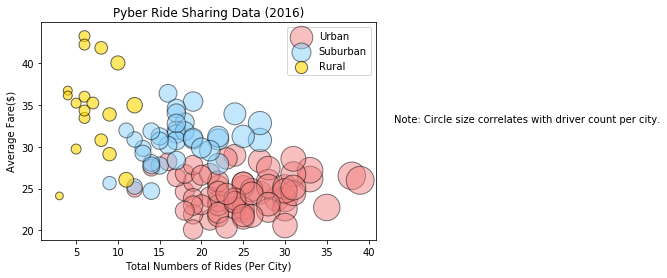

In [49]:
# Obtain the x and y coordinates for each of the three city types
#colors
#colors = {'Gold':'#FFD700', 'Light Sky Blue':'#87CEFA', 'Light Coral':'#F08080'}

#city type
urban_city = city_ride_data.loc[(city_ride_data["type"] == "Urban")]
suburban_city = city_ride_data.loc[(city_ride_data["type"] == "Suburban")]
rural_city = city_ride_data.loc[(city_ride_data["type"] == "Rural")]

#urban
urban_money = urban_city.groupby(['city'])[['fare']].mean()
urban_rides = urban_city.groupby(['city'])[['ride_id']].count()
urban_driver = urban_city.groupby(['city'])[['driver_count']].count()

#suburban
sub_money = suburban_city.groupby(['city'])[['fare']].mean()
sub_rides = suburban_city.groupby(['city'])[['ride_id']].count()
sub_driver = suburban_city.groupby(['city'])[['driver_count']].count()


rural_money = rural_city.groupby(['city'])[['fare']].mean()
rural_rides = rural_city.groupby(['city'])[['ride_id']].count()
rural_driver = rural_city.groupby(['city'])[['driver_count']].count()


# Build the scatter plots for each city types
plt.scatter(urban_rides,urban_money,s = urban_driver*20,
            marker ='o', facecolors ='lightcoral', edgecolors='black',alpha = 0.5, label="Urban")

plt.scatter(sub_rides,sub_money, s = sub_rides*20,
            marker ='o', facecolors ='lightskyblue', edgecolors='black',alpha = 0.5, label="Suburban")

plt.scatter(rural_rides,rural_money, s = rural_driver*20,
            marker ='o', facecolors ='Gold', edgecolors='black',alpha = 0.60, label="Rural")


# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
# x label
plt.xlabel("Total Numbers of Rides (Per City)")
# y label
plt.ylabel("Average Fare($)")
# Create a legend
plt.legend(loc='upper right')

# Incorporate a text label regarding circle size
plt.text(43,33,"Note: Circle size correlates with driver count per city.")
# Save Figure
plt.savefig('Data Sharing.png', dpi=300, bbox_inches='tight')
plt.show()


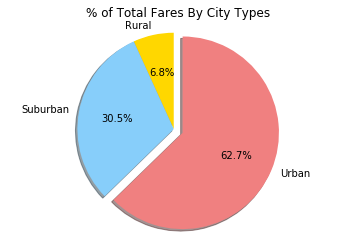

In [59]:
# Calculate Type Percents
fare = city_ride_data.groupby(['type'])['fare'].sum()

# Build Pie Chart
colors = ["gold","lightskyblue","lightcoral"]
labels = ["Rural","Suburban","Urban" ]
explode = (0, 0, 0.1)
plt.title("% of Total Fares By City Types")
plt.pie(fare, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",shadow=True, startangle=90)
plt.axis("equal")


# Save Figure
plt.savefig('pie chrt fare.png', dpi=300, bbox_inches='tight')
plt.show()

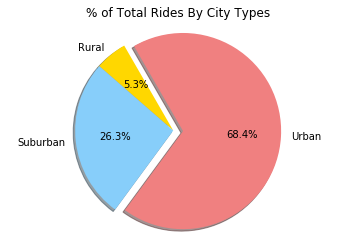

In [70]:
# Calculate Ride Percents
rides = city_ride_data.groupby(['type'])['ride_id'].count()

# Build Pie Chart
colors = ["gold","lightskyblue","lightcoral"]
labels = ["Rural","Suburban","Urban" ]
explode = (0, 0, 0.1)
plt.title("% of Total Rides By City Types")
plt.pie(rides, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",shadow=True, startangle=120)
plt.axis("equal")

# Save Figure
plt.savefig('pie chrt ride.png', dpi=300, bbox_inches='tight')
plt.show()

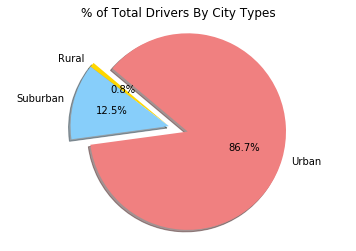

In [71]:
# Calculate Driver Percents
drivers = city_ride_data.groupby(['type'])['driver_count'].sum()

# Build Pie Charts
colors = ["gold","lightskyblue","lightcoral"]
labels = ["Rural","Suburban","Urban" ]
explode = (0, 0, 0.2)
plt.title("% of Total Drivers By City Types")
plt.pie(drivers, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",shadow=True, startangle=140)
plt.axis("equal")
# Save Figure
plt.savefig('pie chrt driver.png', dpi=300, bbox_inches='tight')
plt.show()